# **Explorative analysis of consultations in Rwanda for spatio-temporal clustering**
Please note the usage of the following abbrevations:
- RW = Rw = Rwanda
- hf = healthcare facility
- ...

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# import cleaned and prepared data of consultations in RW
rw_data = pd.read_pickle("data/rw-cleaned-prepared-dynamic-data-phase1.pickle")
rw_village_coordinates = pd.read_pickle("data/rw-village-coordinates.pickle")

In [4]:
rw_data

,medical_case_id,medical_case_local_id,medical_case_consent,medical_case_isEligible,medical_case_redcap,medical_case_consultation_date,medical_case_closed_at,medical_case_force_close,medical_case_redcap_flag,medical_case_duplicate,...,best_match_sector,best_match_district,hf,District,Sector,Cell,Village,coordinates,medical_case_consultation_date_day,patient_age
0,9351,432915f3-9885-4588-a326-685281c58953,1,NaN,1,2021-12-01 09:27:59,2021-12-01 10:35:08,0.0,0,0,...,NaN,NaN,NaN,rusizi,gihundwe,shagasha,karambo,"[[(382597.14719999954, 4724284.171599999), (38...",2021-12-01,0.0
1,9370,78397bda-8d17-4b9f-b0af-e0a8a505727c,1,NaN,1,2021-12-01 09:19:36,2021-12-01 09:53:06,0.0,0,0,...,NaN,NaN,NaN,rusizi,gihundwe,shagasha,karambo,"[[(382597.14719999954, 4724284.171599999), (38...",2021-12-01,2.0
2,10350,e175c80e-500d-44c4-b2b2-44734469d092,1,NaN,1,2021-12-08 11:08:51,2021-12-08 11:57:01,0.0,0,0,...,NaN,NaN,NaN,rusizi,gihundwe,shagasha,karambo,"[[(382597.14719999954, 4724284.171599999), (38...",2021-12-08,2.0
3,10595,ef3869da-f293-4c73-9ab9-62cde8b70297,1,NaN,1,2021-12-09 11:01:45,2021-12-09 13:03:04,0.0,0,0,...,NaN,NaN,NaN,rusizi,gihundwe,shagasha,karambo,"[[(382597.14719999954, 4724284.171599999), (38...",2021-12-09,0.0
4,10851,e8b415d6-0263-4066-9d04-9e4ed936c2ed,1,NaN,1,2021-12-10 08:10:30,2021-12-10 10:13:05,0.0,0,0,...,NaN,NaN,NaN,rusizi,gihundwe,shagasha,karambo,"[[(382597.14719999954, 4724284.171599999), (38...",2021-12-10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,84028,65d1a5fe-0f19-4ecb-b44d-dcaf09793226,1,NaN,1,2023-01-17 08:44:57,2023-01-17 11:52:04,0.0,0,0,...,nzahaha,rusizi,NaN,rusizi,nzahaha,murya,kamina,"[[(382278.28949999996, 4706193.5057), (382269....",2023-01-17,10.0
1507,84502,c2934596-b8d6-4dbb-9b29-b62ee0ec900e,1,NaN,1,2023-01-18 15:11:40,2023-01-19 03:13:26,1.0,0,0,...,nzahaha,rusizi,NaN,rusizi,nzahaha,murya,nyagahanga,"[[(382591.9961000001, 4704557.134199999), (382...",2023-01-18,5.0
1508,84699,d42ccf2f-0986-4198-bfac-020a6f41e76c,1,NaN,1,2023-01-18 12:09:26,2023-01-19 00:24:05,1.0,0,0,...,nyakabuye,rusizi,NaN,rusizi,nyakabuye,kiziho,bunyereri,"[[(393589.6238000002, 4715390.067299999), (393...",2023-01-18,5.0
1509,86444,ec18bffd-0847-49b4-bd91-d9ae730006a8,1,NaN,1,2023-01-26 12:02:15,2023-01-26 15:14:47,0.0,0,0,...,nyakabuye,rusizi,NaN,rusizi,nyakabuye,nyabintare,gatare,"[[(395765.4064999996, 4718929.611400001), (395...",2023-01-26,3.0


In [5]:
# analysis of time space of data (= column "medical_case_consultation_date_day")
study_start = rw_data["medical_case_consultation_date_day"].sort_values().iloc[0]
study_end = rw_data["medical_case_consultation_date_day"].sort_values().iloc[-1]
print("Time: used data was collected from", study_start, "till", study_end)

# analysis of geo space of data (= location of health facilities)
print("Geo: data was collected from", rw_data["health_facility_name"].unique().size, "health facilities")

Time: used data was collected from 2021-12-01 till 2023-02-10
Geo: data was collected from 61 health facilities


## Demographic of people who seeked consultation
Analyse columns:
1. age: "patient_age" (age in years at consultation) or "patient_birthdate" (age in days at consultation)
2. gender: "patient_gender"
3. origin: "BD9 - Village (Umudugudu) - 8062"
4. columns with diagnosis (= labels for supervised classification)

### General about patients (= people who seeked consultation)

Number of patients in dataset: 36955


<AxesSubplot:title={'center':'Number of consultations per patient'}>

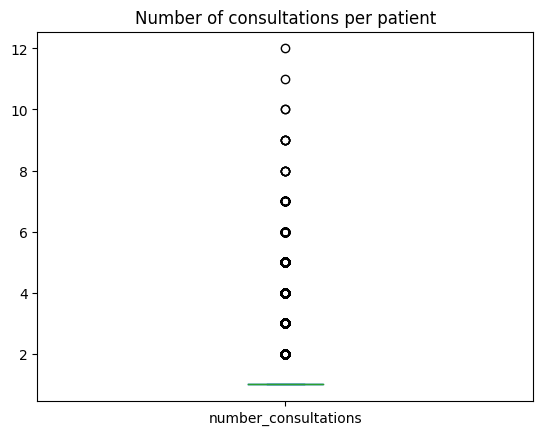

In [6]:
# number of patients
print("Number of patients in dataset:", rw_data["patient_id"].unique().size)

# number of consultations seeked by patients
rw_data.groupby("patient_id")["medical_case_id"].count().reset_index(name="number_consultations").plot(
    kind="box",
    y="number_consultations",
    title="Number of consultations per patient"
)

In [7]:
# amount of patients over time --> see consultations over time or gender of patients over time

#### Conclusion - general about patients
- patient_id is not unique since patients can have more than one consultation

### Age

count    47886.000000
mean         3.268868
std          3.549796
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         15.000000
Name: patient_age, dtype: float64


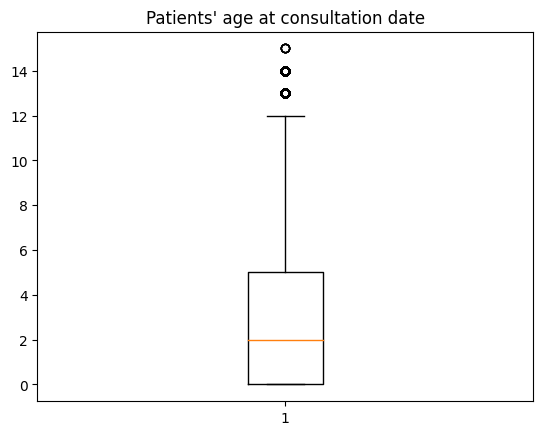

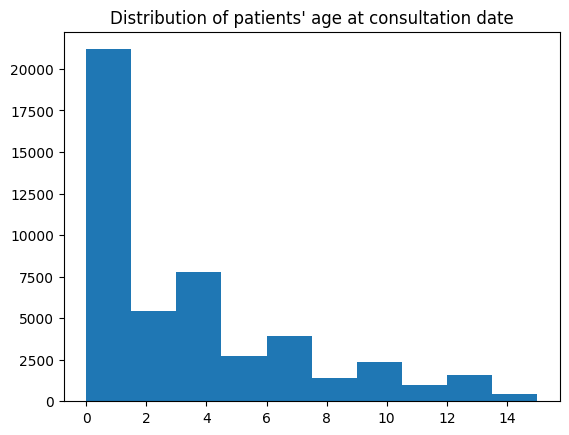

<AxesSubplot:title={'center':"Patients' age at consultation date"}, xlabel='patient_age'>

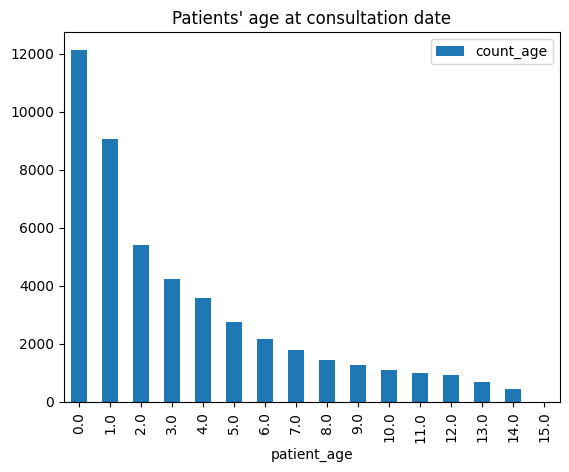

In [8]:
# analysis of age accross the data set
print(rw_data["patient_age"].describe())

plt.boxplot(rw_data["patient_age"])
plt.title("Patients' age at consultation date")
plt.show()

plt.hist(rw_data["patient_age"])
plt.title("Distribution of patients' age at consultation date")
plt.show()

rw_data.groupby(["patient_age"])["patient_id"].count().reset_index( 
    name="count_age"
    ).plot(
        kind="bar",
        x="patient_age", 
        y="count_age", 
        title="Patients' age at consultation date"
    )

In [9]:
# patients who were older than 15 years which should not be the case
rw_data[rw_data["patient_age"] > 15]

,medical_case_id,medical_case_local_id,medical_case_consent,medical_case_isEligible,medical_case_redcap,medical_case_consultation_date,medical_case_closed_at,medical_case_force_close,medical_case_redcap_flag,medical_case_duplicate,...,best_match_sector,best_match_district,hf,District,Sector,Cell,Village,coordinates,medical_case_consultation_date_day,patient_age


<AxesSubplot:title={'center':'Average patient age during consultation over time from 2021-12-01 till 2023-02-10'}, xlabel='medical_case_consultation_date_day'>

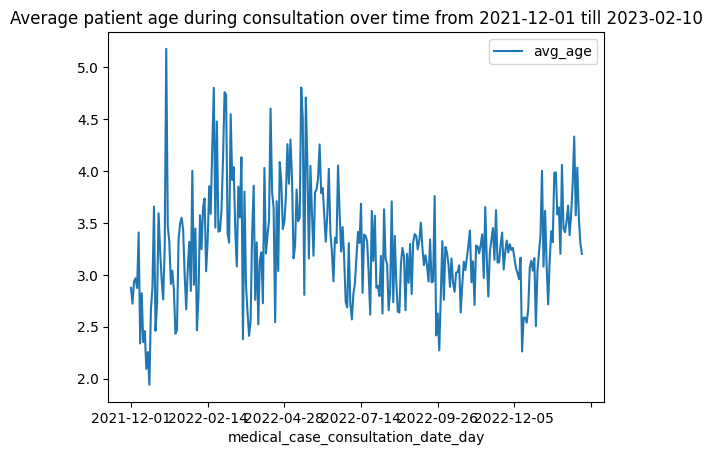

In [10]:
# age over time
rw_data.groupby("medical_case_consultation_date_day")["patient_age"].mean().reset_index(
    name="avg_age"
    ).plot(
        x="medical_case_consultation_date_day", 
        y="avg_age", 
        title="Average patient age during consultation over time from " + study_start + " till " + study_end
    )

<AxesSubplot:title={'center':'Average patient age during consultation of each health facility'}, xlabel='health_facility_name'>

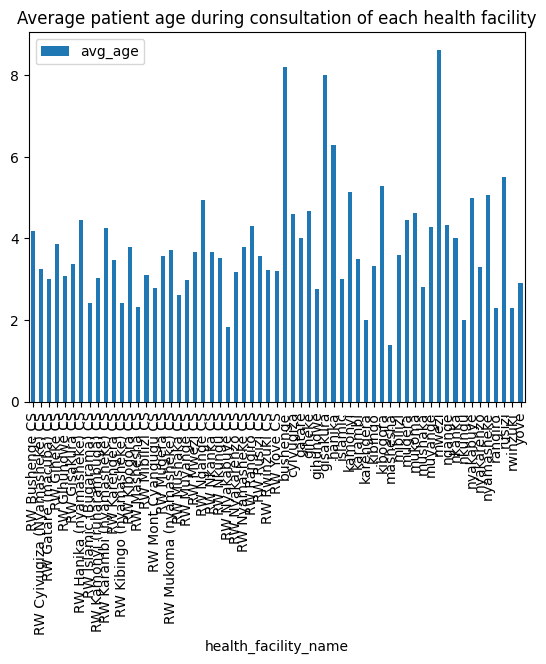

In [11]:
# age accross hf locations
rw_data.groupby("health_facility_name")["patient_age"].mean().reset_index(
    name="avg_age"
    ).plot(
        kind="bar",
        x="health_facility_name", 
        y="avg_age", 
        title="Average patient age during consultation of each health facility",
        rot=90
    )

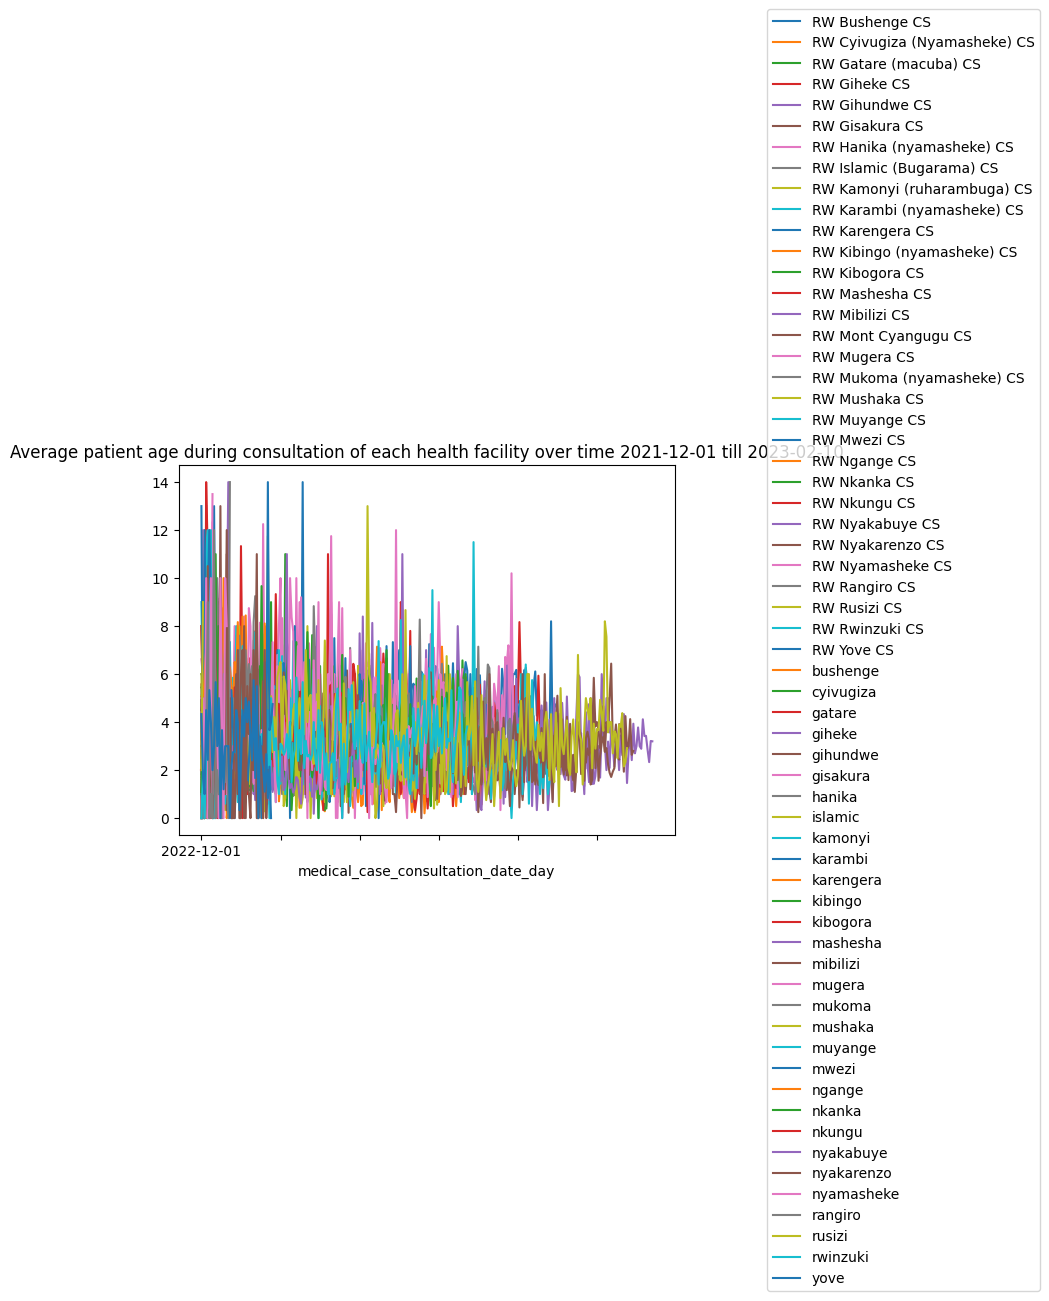

In [12]:
# age accross hf locations over time
avg_age_per_hf_time = rw_data.groupby(["health_facility_name", "medical_case_consultation_date_day"])["patient_age"].mean().reset_index(name="avg_age")

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in avg_age_per_hf_time.groupby("health_facility_name"):
    data.plot(x="medical_case_consultation_date_day", y="avg_age", ax=ax, label=key)

ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.title("Average patient age during consultation of each health facility over time "+ study_start + " till " + study_end)
plt.show()


#### Conclusion - Age
- age should be always lower than 15, but there are 82 outlier patients who are over 15. Some of them are even over 40.
- looking average age during consultation over time, one can see that the outliers were recorded in 1970 (which is an error itself probably)
- looking at the average age during consultation fp each hf, one can see that the outliers were recorded in RW Nkombo hf

### Gender

types of gender in dataset: ['male' 'female' nan]


<AxesSubplot:title={'center':"Patient's gender during consultation"}, xlabel='patient_gender'>

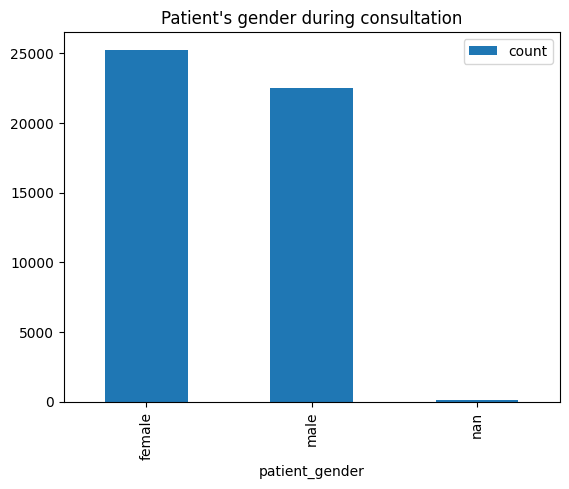

In [13]:
# identify used types of gender
print("types of gender in dataset:", rw_data["patient_gender"].unique())
rw_data.groupby("patient_gender", dropna=False)["patient_id"].count().reset_index(name="count").plot(
    kind="bar",
    x="patient_gender",
    y="count",
    title="Patient's gender during consultation"
)

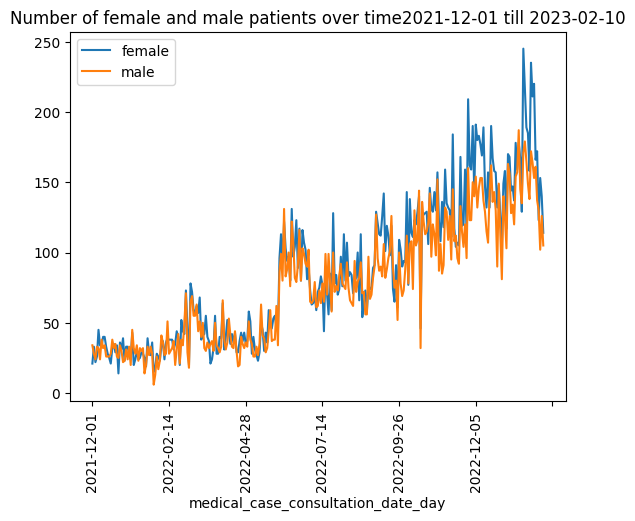

In [14]:
# gender over time
gender_per_time = rw_data.groupby(["patient_gender", "medical_case_consultation_date_day"])["patient_id"].count().reset_index(name="count")
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in gender_per_time.groupby("patient_gender"):
    data.plot(x="medical_case_consultation_date_day", y="count", ax=ax, label=key)

plt.title("Number of female and male patients over time" + study_start + " till " + study_end)
plt.xticks(rotation='vertical')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (61,) and arg 1 with shape (60,).

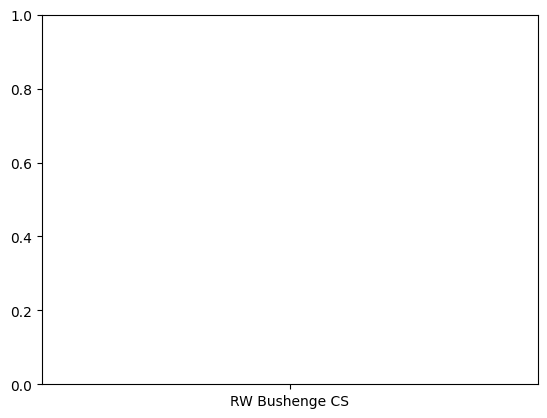

In [15]:
# gender accross hf
gender_per_hf = rw_data.groupby(["health_facility_name", "patient_gender"])["patient_id"].count().reset_index(name="count")

plt.bar(gender_per_hf["health_facility_name"].unique(), gender_per_hf[gender_per_hf["patient_gender"] == "female"]["count"], label="female")
plt.bar(gender_per_hf["health_facility_name"].unique(), gender_per_hf[gender_per_hf["patient_gender"] == "male"]["count"], bottom=gender_per_hf[gender_per_hf["patient_gender"] == "female"]["count"], label="male")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# gender accross hf over time

### Origin

In [ ]:
# TODO
rw_data["BD9 - Village (Umudugudu) - 8062"]

## Temporal analysis: Consultations over time
Time = medical_case_consultation_date_day (column constructed out of "medical_case_consultation_date")

In [ ]:
# count consultations per day
consultation_count_per_day = rw_data.groupby("medical_case_consultation_date_day")["medical_case_id"].count().reset_index(name="count_consultation")
consultation_count_per_day.plot(x="medical_case_consultation_date_day", y="count_consultation", title="Number of consultations per day from " + study_start + " till " + study_end, rot=90)
# note: 0 in the graph means probably that the app was down for this day

## Spatial analysis
1. of consultations' location (= hf)
    - health_facility_name
    - health_facility_id
    - health_facility_latitude & health_facility_longitude
2. of patients' origin

### Analysis of onsultations' location

In [30]:
consultations_per_hf = rw_data.groupby(["health_facility_id", "health_facility_name", "health_facility_latitude", "health_facility_longitude"]).size().reset_index(name="number_consultations").drop_duplicates(["health_facility_id"])
consultations_per_hf

,health_facility_id,health_facility_name,health_facility_latitude,health_facility_longitude,number_consultations
0,500,RW Mugera CS,-2.0,29.0,1311
2,501,RW Mukoma (nyamasheke) CS,-2.0,29.0,1856
4,502,RW Cyivugiza (Nyamasheke) CS,-2.0,29.0,212
6,506,RW Gatare (macuba) CS,-2.0,29.0,185
8,507,RW Hanika (nyamasheke) CS,-2.0,29.0,981
10,508,RW Karambi (nyamasheke) CS,-2.0,29.0,490
12,509,RW Karengera CS,-2.0,29.0,917
14,510,RW Kibingo (nyamasheke) CS,-2.0,29.0,1249
16,511,RW Kibogora CS,-2.0,29.0,1766
18,514,RW Kamonyi (ruharambuga) CS,-2.0,29.0,746


In [35]:
fig = px.density_mapbox(consultations_per_hf, lat='health_facility_latitude', lon='health_facility_longitude', z='number_consultations',hover_name = 'health_facility_name',
                                hover_data = ['number_consultations'], radius=10,
                                center=dict(lat=-2.0, lon=28.5), zoom=7,
                                mapbox_style="stamen-terrain") #animation_frame='Date' for temporal dimension
fig.show()

### Analysis of patient's origin

In [ ]:
# TODO experiment with visualising shapes
#https://plotly.com/python/choropleth-maps/
for location rw_data["coordinates"]

1

In [ ]:
rw_data.columns

Index(['medical_case_id', 'medical_case_local_id', 'medical_case_consent',
       'medical_case_isEligible', 'medical_case_redcap',
       'medical_case_consultation_date', 'medical_case_closed_at',
       'medical_case_force_close', 'medical_case_redcap_flag',
       'medical_case_duplicate',
       ...
       'best_match_sector', 'best_match_district', 'hf', 'District', 'Sector',
       'Cell', 'Village', 'coordinates', 'medical_case_consultation_date_day',
       'patient_age'],
      dtype='object', length=2050)

In [ ]:
# visualise consultations per village
rw_data.groupby(["coordinates"])["medical_case_id"].count().plot()

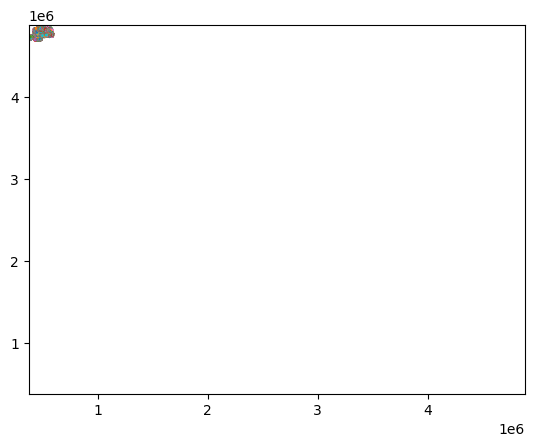

In [ ]:
plt.figure()
plt.margins(x=0, y=0)
for shape in rw_village_coordinates["coordinates"]:
    x = [i[0] for i in shape[0]]
    y = [i[1] for i in shape[0]]
    plt.plot(x,y)
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
shapefile = gpd.read_file('path/to/shapefile.shp')

# Define column to visualize
column_to_visualize = 'population'

# Create choropleth map
fig, ax = plt.subplots(1, 1)
shapefile.plot(column=column_to_visualize, ax=ax, legend=True)

# Add title and axis labels
ax.set_title('Population Choropleth Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show plot
plt.show()


<AxesSubplot:title={'center':'Number of consultations per health facility from 2021-12-01 till 2023-02-10'}, xlabel='health_facility_name'>

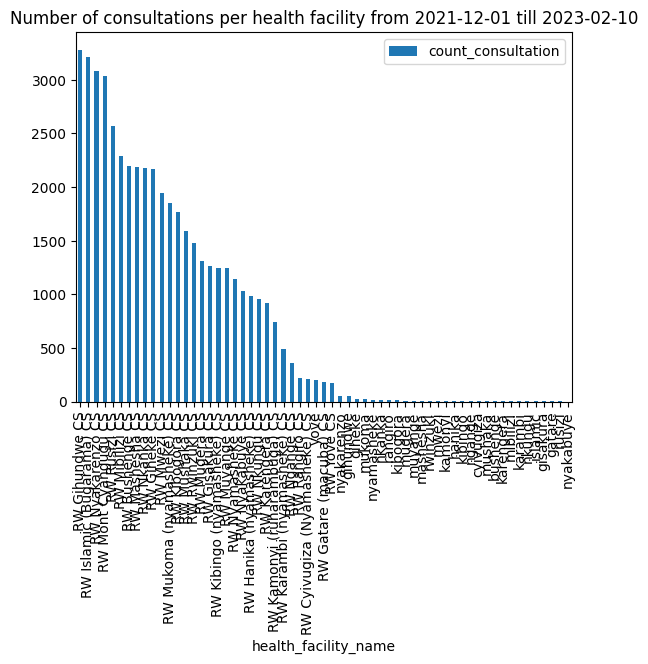

In [ ]:
# count consultations per health facility
consultation_count_per_hf = rw_data.groupby("health_facility_name")["medical_case_id"].count().reset_index(name="count_consultation").sort_values(["count_consultation"], ascending=False)
consultation_count_per_hf.plot(x="health_facility_name", y="count_consultation", kind="bar", title="Number of consultations per health facility from " + study_start + " till " + study_end)

## Spatio-temporal analysis: Consultations' location over time

In [ ]:
# amount of consultations over time across for each health facilities (hf)
consultation_count_per_hf_over_time = rw_data.groupby(["health_facility_name", "medical_case_consultation_date_day"])["medical_case_id"].count().reset_index(name="count_consultation")
for hf in rw_data["health_facility_name"].unique():
    # consultations over time for each hf
    consultation_count_per_hf_over_time[consultation_count_per_hf_over_time["health_facility_name"]==hf].plot(x="medical_case_consultation_date_day", y="count_consultation", title="Number of consultations at "+hf+" over time", rot=90)

# Removing columns
(due to irrelevance for spatio temporal clustering of symptoms according to domain experts)



In [ ]:
# TODO remove columns which did not pass quality control
# NOTE todo has become obsolete

In [ ]:
# TODO remove columns which are not relevant according to domain experts